<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lab-7" data-toc-modified-id="Lab-7-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lab 7</a></span><ul class="toc-item"><li><span><a href="#Linear-SVM---Iris-Dataset" data-toc-modified-id="Linear-SVM---Iris-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Linear SVM - Iris Dataset</a></span></li><li><span><a href="#SVM---MNIST-Handwritten-Digits" data-toc-modified-id="SVM---MNIST-Handwritten-Digits-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>SVM - MNIST Handwritten Digits</a></span></li><li><span><a href="#Gradient-Descent-Algorithms-Compared" data-toc-modified-id="Gradient-Descent-Algorithms-Compared-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Gradient Descent Algorithms Compared</a></span></li></ul></li></ul></div>

# Lab 7

The goal of this lab is to explore a variety of SVM/SVC techniques in Python

1. Use the handson github repository, use the code in chapter 9 as a tutorial.

2. Train a linear SVM classifier (SVC) on 2 classes separable classes of the Iris dataset. Report the parameters of the linear separator and the accuracy.

3. Train an SVC on MNIST data (OvR) to classify the 5s

4. [extra] Generate data for a quadratic model plus noise. Apply SGD, miniBatch GD, and batch GD. Compare the learning curves.

## Linear SVM - Iris Dataset

In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style()

In [86]:
support_model = svm.SVC(kernel='linear', gamma='scale')
data = pd.read_csv('data/iris.csv')

In [87]:
#help(svm.SVC)

In [88]:
# suppose we're only interested in petal_length and petal_width
features = data.values[:, 2:4]
labels = data.values[:, 4]

In [89]:
# encode the labels as integer values for easy & convenient color coding in matplotlib graphs
encode_key = [i for i in enumerate(np.unique(labels))]
encoded_labels = []

for i in labels:
    for j in encode_key:
        if i == j[1]: encoded_labels.append(j[0])
encoded_labels = np.asarray(encoded_labels)

In [90]:
# split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(features, labels, test_size = .33)

In [91]:
# fit the data
support_model.fit(trainX, trainY)

C:\Users\allen\Miniconda3\envs\idp\lib\site-packages\sklearn\daal4sklearn\svm.py:238: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  self.n_support_ = np.array([np.sum(indices == c) for c in self.classes_], dtype=np.int32)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [92]:
# make some predictions
predictions = support_model.predict(testX)

,parameter,value
0,C,1
1,cache_size,200
2,class_weight,None
3,coef0,0
4,decision_function_shape,ovr
5,degree,3
6,gamma,scale
7,kernel,linear
8,max_iter,-1
9,probability,False


Training set accuracy: 0.98
Test set accuracy: 0.96


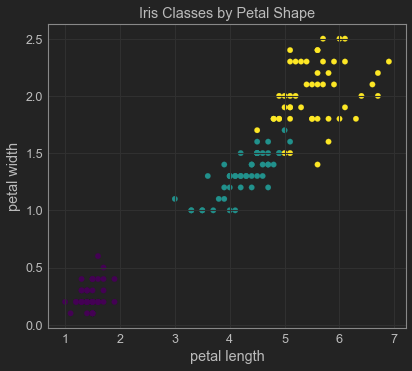

In [93]:
# print the parameters
params_ = support_model.get_params()
params = pd.DataFrame(list(params_.items()), columns=['parameter', 'value'])
#params = pd.DataFrame(params_, index=['values']).T.reindex()

display(params)

# show accuracies
print("Training set accuracy: {}".format(support_model.score(trainX, trainY)))
print("Test set accuracy: {}".format(support_model.score(testX, testY)))


# plot the data
fig, ax = plt.subplots()

ax.set_ylabel('petal width')
ax.set_xlabel('petal length')
ax.set_title("Iris Classes by Petal Shape")

ax.scatter(features[:,0], 
           features[:,1], 
           c=encoded_labels,)

## SVM - MNIST Handwritten Digits

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd

from sklearn import svm

In [32]:
# import the data
data = pd.read_csv('data/mnist/train.csv')
data = data.values

In [23]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=0.25)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, 

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(data[:,1:], data[:,0], test_size=0.33, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()

stdscaler.fit_transform(train)
stdscaler.transform(test)

C:\Users\allen\Miniconda3\envs\idp\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\allen\Miniconda3\envs\idp\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\allen\Miniconda3\envs\idp\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


ValueError: operands could not be broadcast together with shapes (28000,784) (785,) (28000,784) 

In [43]:
# linear SVM
support_model = svm.LinearSVC()#max_iter=10000)

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier

n_estimators = 10
clf = OneVsRestClassifier(BaggingClassifier(support_model, 
                                            max_samples = 1.0 / n_estimators, 
                                            n_estimators = n_estimators), n_jobs=-1)

clf.fit(X_train, Y_train)


print("LinearSVC with Bagging", clf.score(X_test, Y_test))
predictions = clf.predict(X_test)

LinearSVC with Bagging 0.8994227994227995


## Gradient Descent Algorithms Compared

Generate data for a quadratic model plus noise. Apply SGD, miniBatch GD, and batch GD. Compare the learning curves.

In [58]:
# Essential imports
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# import jtplot submodule from jupyterthemes to style our plots
from jupyterthemes import jtplot
jtplot.style()

In [60]:
# Import learning tools
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [61]:
# probability density function of a gaussian random variable
# note that this is a normal distrubution, so (mean = median = mode)
p_g = lambda x, mean, variance : 1/np.sqrt(2*np.pi*variance)*np.exp(-((x-mean)**2)/(2*variance))

In [62]:
# function that generates a set of points that are a random, constrained distance
# from our ideal quadratic curve
data_gen = lambda x : (0.5)*x**2 + np.random.normal(0,1)

# generate our input points in the x-dimension
x = np.linspace(-3,3,100)

# generate our synthetic dataset (aka the y-values of scatterplot points)
data = [data_gen(i) for i in x]

# prepare synthetic dataset graph for regression
#x = np.linspace(-3,3,100)
x = x[:, np.newaxis]

y = np.asarray(data)
y = y[:, np.newaxis]

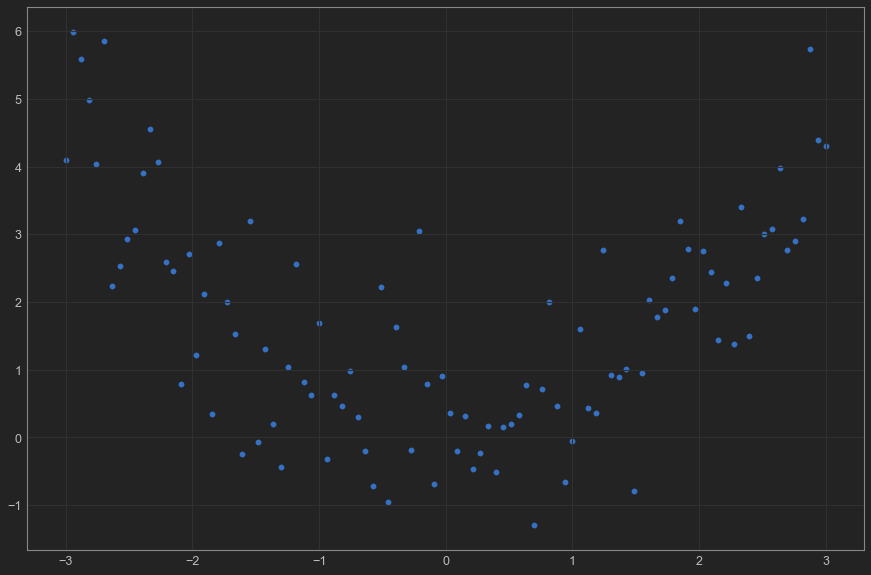

In [64]:
# plot it
plt.figure(figsize=(15,10))

    # raw synthetic dataset
plt.scatter(x, y)